# Distribution B - Maximum Likelihood - Convergance Rate

In [87]:
import DistExampB as db
from matplotlib import pyplot as plot
import sympy as sp

import MleDist

from math import log, pi
from numpy import sinc

from LocUtil import Grid1, SetSeed, UnZip
from LocMath import Interp1
from Map import LogRatio
from Sinc import SincApprox

In [84]:
nPlot = 101

## Code

In [58]:
def LogLike(pdfApprox, map_, sampX):
	sampZ = tuple(map_.Forward(x) for x in sampX)
	pdfEst = pdfApprox.InterpZ1(sampZ)
	
	result = sum(log(p) for p in pdfEst)
	return result

## Main

### Setup

In [59]:
import importlib
importlib.reload(MleDist)

<module 'MleDist' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\MleDist.py'>

In [60]:
dist = db.ExampB()

In [61]:
xSym = sp.Symbol('x')
zSym = sp.Symbol('z')

map_ = LogRatio(xSym,zSym, xRange=(0,2))
map_.forSym

log(x/(2 - x))

### Solve

In [62]:
nSamp = 100

In [63]:
seed = SetSeed()
print(f'seed = {seed}')

seed = 66302


In [64]:
sampX = tuple(dist.Sample() for _ in range(nSamp))

In [75]:
nSincRange = (10,)

In [76]:
import importlib
importlib.reload(MleDist)

<module 'MleDist' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\MleDist.py'>

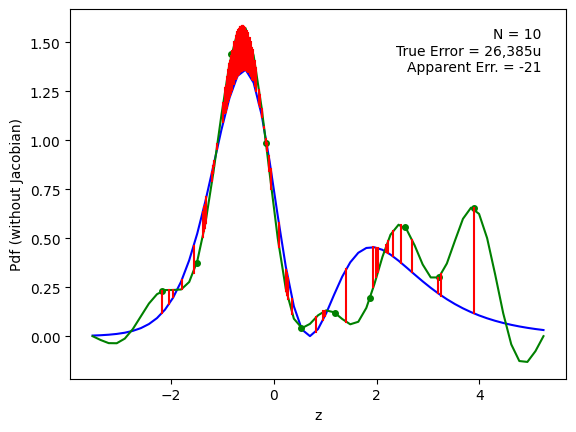

In [77]:
info = []

for nSinc in nSincRange:
	# compute MLE
	pdfApprox = MleDist.Sinc(sampX, map_, nSinc)
	
	# get errors of est
	rmsErr,rmsInfo = MleDist.RmsDiff(pdfApprox, dist.Pdf, epsMin=1e-6)
	logLike = LogLike(pdfApprox, map_, sampX)
	
	# plot
	text = (
		f'N = {nSinc}\n'
		f'True Error = {round(1e6 * rmsErr):,d}u\n'
		f'Apparent Err. = {round(logLike):,d}'
	)
	
	# fig,ax = plot.subplots(figsize=(9, 6.5))
	MleDist.PlotPdfEstZ(pdfApprox, dist.Pdf, sampX, text)
	plot.show()
	
	# accumulate results
	info.append([nSinc, seed, [rmsErr, rmsInfo, logLike]])

In [78]:
info

[[10,
  66302,
  [0.026385000497623046,
   (-1.4454890961690299, 0.1469337003359974, 6),
   -20.56927378215728]]]

In [91]:
TailEnv = lambda z,zk,h: h / (pi * abs(z - zk))

In [98]:
def Env(z, sincApprox):
	h = sincApprox.h
	sincZ = sincApprox.sincZ
	sincV = sincApprox.sincV
	
	result = sum(v * TailEnv(z,zk,h) for (zk,v) in zip(sincZ, sincV))
	return result

In [99]:
Env(-10, pdfApprox)

0.10212941342947174

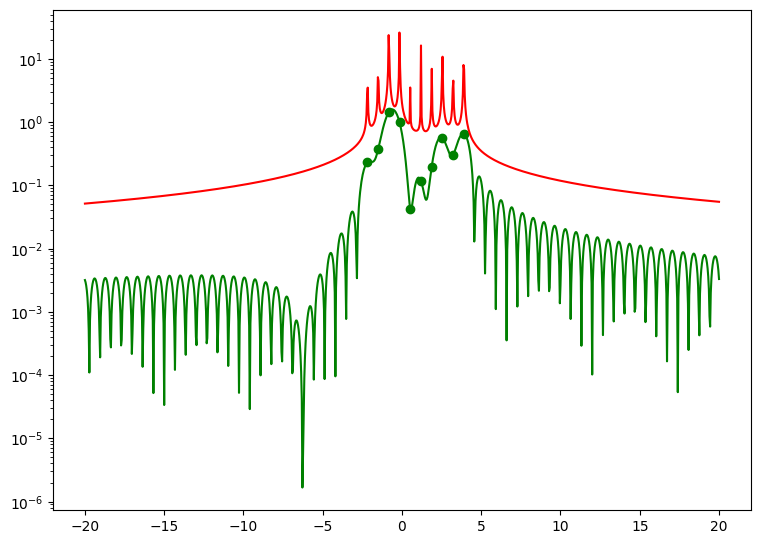

In [100]:
plot.figure(figsize=(9, 6.5))

nPlot = 1_001
zGrid = Grid1(-20,20, nPlot)
approx = pdfApprox.InterpZ1(zGrid)
approx = tuple(abs(v) for v in approx)

plot.semilogy(zGrid, approx, c='green')

sincZ = pdfApprox.sincZ
absSincV = tuple(abs(v) for v in pdfApprox.sincV)
plot.semilogy(sincZ,absSincV, 'o', c='green')

env = tuple(Env(z,pdfApprox) for z in zGrid)
plot.semilogy(zGrid,env, c='red')

envLeft = pdfApprox.sincV[0]

### Graph

In [ ]:
fix,ax0 = plot.subplots()

n,_,errTrue,errApp = UnZip(info)

ax0.plot(n,errTrue, c='blue')
ax0.set_ylabel('RMS Error', c='blue')
ax0.tick_params(axis='y', labelcolor='blue')

ax1 = ax0.twinx()
ax1.plot(n,errApp, c='green')
ax1.set_ylabel('Log Likelihood', c='green')
ax1.tick_params(axis='y', labelcolor='green')

plot.xlabel('n')

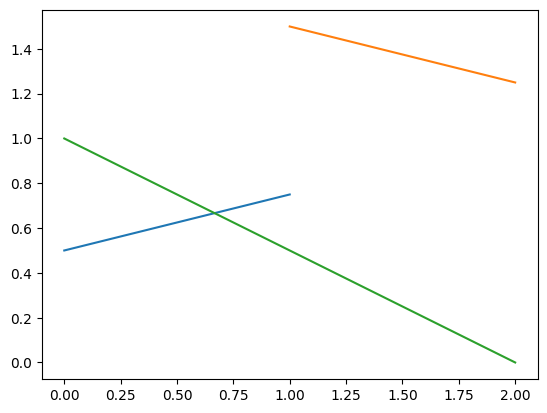

In [68]:
plot.plot(([0,1,2], [1,2,0]), [[1/2,3/2,0], [3/4,5/4,1]])

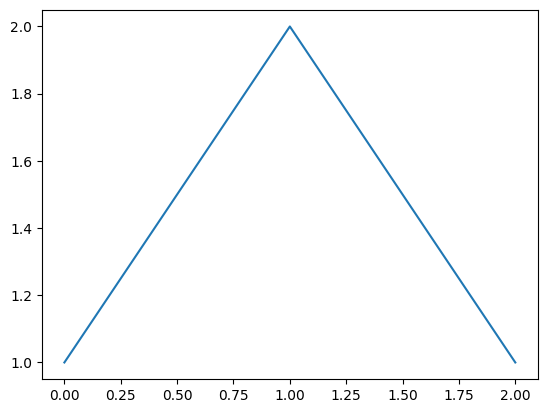

In [69]:
plot.plot([0,1,2], [1,2,1])